In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
!pip install scienceplots
import scienceplots as sp
import sys
plt.style.use(['science','notebook','grid'])


In [6]:
x_train = np.array([[1,2],[2,1],[3,-0],[2,3],[3,2],[4,1]])
y_train = np.array([0,0,0,1,1,1])

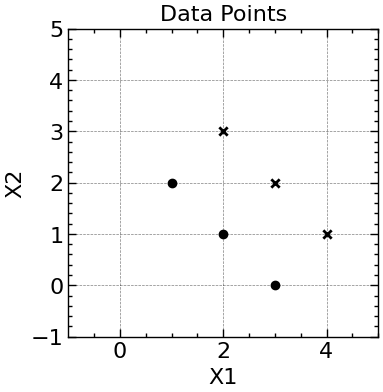

In [34]:
fig,ax = plt.subplots(figsize=(4, 4))
for i in range (x_train.shape[0]):
    x = x_train[i,0]
    y = x_train[i,1]
    if y_train[i] == 0:
      ax.scatter(x,y,marker="o" , color="black")
    else:
      ax.scatter(x,y,marker="x",color = "black")




ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Data Points')
plt.show()

## Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$


In [20]:
def compute_cost_vectorized(x,y,w,b):
  z = np.dot(x,w)+ b
  g_z = 1/(1+np.exp(-z))
  ep = 1e-8

  loss = -y* np.log(g_z + ep)-(1-y)*np.log(1-g_z+ep)
  total_loss = np.sum(loss)
  mean_loss = total_loss/x.shape[0]

  return mean_loss


In [21]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_vectorized(x_train, y_train, w_tmp, b_tmp))

0.4100375801247826


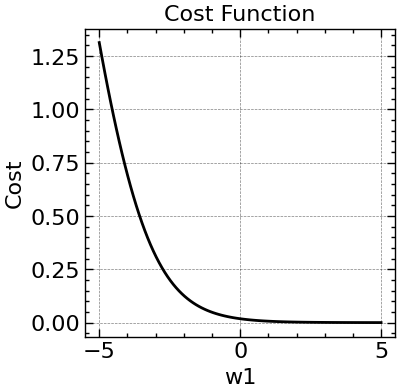

In [27]:
w2_fixed = 1
b_fixed = 3

# Generate a range of values for w1
w1_values = np.linspace(-5, 5, 100)

# Assuming x has two features, create a dummy dataset
x_dummy = np.ones((100, 2))

# Compute the cost for each w1 value
cost_values = np.zeros_like(w1_values)
for i, w1 in enumerate(w1_values):
    w = np.array([w1, w2_fixed])
    cost_values[i] = compute_cost_vectorized(x_dummy, np.ones(100), w, b_fixed)

# Plot the cost function
plt.figure(figsize=(4, 4))
plt.plot(w1_values, cost_values,color="black")
plt.title('Cost Function')
plt.xlabel('w1')
plt.ylabel('Cost')
plt.show()

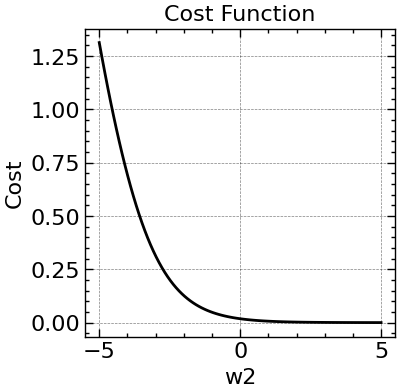

In [28]:
w1_fixed = 1
b_fixed = 3

# Generate a range of values for w1
w2_values = np.linspace(-5, 5, 100)

# Assuming x has two features, create a dummy dataset
x_dummy = np.ones((100, 2))

# Compute the cost for each w1 value
cost_values = np.zeros_like(w1_values)
for i, w2 in enumerate(w1_values):
    w = np.array([w1_fixed, w2 ])
    cost_values[i] = compute_cost_vectorized(x_dummy, np.ones(100), w, b_fixed)

# Plot the cost function
plt.figure(figsize=(4, 4))
plt.plot(w1_values, cost_values,color="black")
plt.title('Cost Function')
plt.xlabel('w2')
plt.ylabel('Cost')
plt.show()

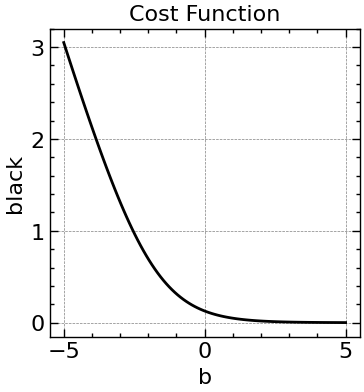

In [32]:
w1_fixed = 1
w2_fixed = 1

# Generate a range of values for b
b_values = np.linspace(-5, 5, 100)

# Assuming x has two features, create a dummy dataset
x_dummy = np.ones((100, 2))

# Compute the cost for each b value
cost_values = np.zeros_like(b_values)
for i, b_value in enumerate(b_values):
    w = np.array([w1_fixed, w2_fixed])
    cost_values[i] = compute_cost_vectorized(x_dummy, np.ones(100), w, b_value)

# Plot the cost function
plt.figure(figsize=(4, 4))
plt.plot(b_values, cost_values,color = "black")
plt.title('Cost Function')
plt.xlabel('b')
plt.ylabel('black')
plt.show()


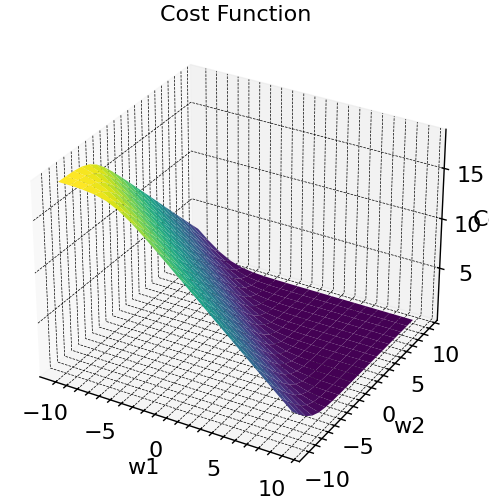

In [35]:
w1_values = np.linspace(-10, 10, 20)
w2_values = np.linspace(-10, 10, 20)

# Create a meshgrid for w1 and w2
w1_mesh, w2_mesh = np.meshgrid(w1_values, w2_values)

# Initialize the cost_values array
cost_values = np.zeros_like(w1_mesh)

# Compute the cost for each combination of w1, w2, and b
for i in range(w1_mesh.shape[0]):
    for j in range(w1_mesh.shape[1]):
        w = np.array([w1_mesh[i, j], w2_mesh[i, j]])
        cost_values[i, j] = compute_cost_vectorized(x_dummy, np.ones(100), w, -3)  # Fixing b at -3

# Plot the 3D surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1_mesh, w2_mesh, cost_values, cmap='viridis')

# Set labels
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')

plt.title('Cost Function')
plt.show()

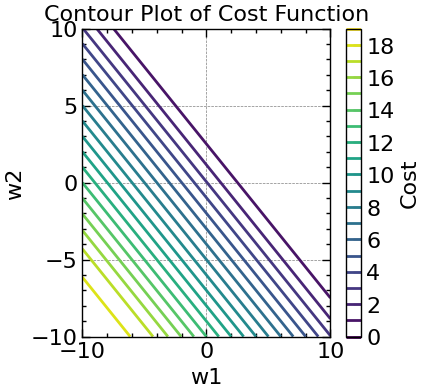

In [40]:
w1_values = np.linspace(-10, 10, 20)
w2_values = np.linspace(-10, 10, 20)

# Create a meshgrid for w1 and w2
w1_mesh, w2_mesh = np.meshgrid(w1_values, w2_values)

# Initialize the cost_values array
cost_values = np.zeros_like(w1_mesh)

# Compute the cost for each combination of w1, w2, and b
for i in range(w1_mesh.shape[0]):
    for j in range(w1_mesh.shape[1]):
        w = np.array([w1_mesh[i, j], w2_mesh[i, j]])
        cost_values[i, j] = compute_cost_vectorized(x_dummy, np.ones(100), w, -3)  # Fixing b at -3

# Plot the contour plot
plt.figure(figsize=(4, 4))
contour_plot = plt.contour(w1_mesh, w2_mesh, cost_values, levels=20, cmap='viridis')
plt.colorbar(contour_plot, label='Cost')

# Set labels

plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of Cost Function')

plt.show()
